In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
    df = pd.read_csv("data.csv", delimiter='\t')
    df

,Возраст(лет),Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита(тыс. руб.)
0,37.0,1.0,7400.0,9.0,7000.0,70000.0
1,45.0,3.0,33100.0,12.0,34000.0,337000.0
2,NaN,1.0,18700.0,5.0,17000.0,176000.0
3,39.0,2.0,29100.0,9.0,29000.0,289000.0
4,33.0,1.0,11400.0,6.0,10000.0,104000.0
5,28.0,1.0,20100.0,NaN,18000.0,184000.0
6,47.0,NaN,4400.0,15.0,6000.0,55000.0
7,36.0,2.0,30500.0,7.0,NaN,299000.0
8,45.0,3.0,32300.0,12.0,33000.0,330000.0
9,39.0,2.0,25900.0,9.0,26000.0,NaN


In [10]:
# Преобразование всех строковых столбцов, если они содержат числовые значения в виде строк
for column in df.columns:
    if df[column].dtype == object:
        df[column] = pd.to_numeric(df[column], errors='coerce')
df

,Возраст(лет),Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита(тыс. руб.)
0,37.0,1.0,7400.0,9.0,7000.0,70000.0
1,45.0,3.0,33100.0,12.0,34000.0,337000.0
2,NaN,1.0,18700.0,5.0,17000.0,176000.0
3,39.0,2.0,29100.0,9.0,29000.0,289000.0
4,33.0,1.0,11400.0,6.0,10000.0,104000.0
5,28.0,1.0,20100.0,NaN,18000.0,184000.0
6,47.0,NaN,4400.0,15.0,6000.0,55000.0
7,36.0,2.0,30500.0,7.0,NaN,299000.0
8,45.0,3.0,32300.0,12.0,33000.0,330000.0
9,39.0,2.0,25900.0,9.0,26000.0,NaN


In [11]:
# Среднее значение по каждому столбцу
# Параметр skipna=True игнорирует NaN значения.
mean_values = df.mean(skipna=True)
mean_values

Возраст(лет)                      39.306122
Количество иждивенцев              2.020408
Доход                          19304.081633
Срок проживания в регионе         10.244898
Оценка автомобиля заемщика     21530.612245
Размер кредита(тыс. руб.)     198979.591837
dtype: float64

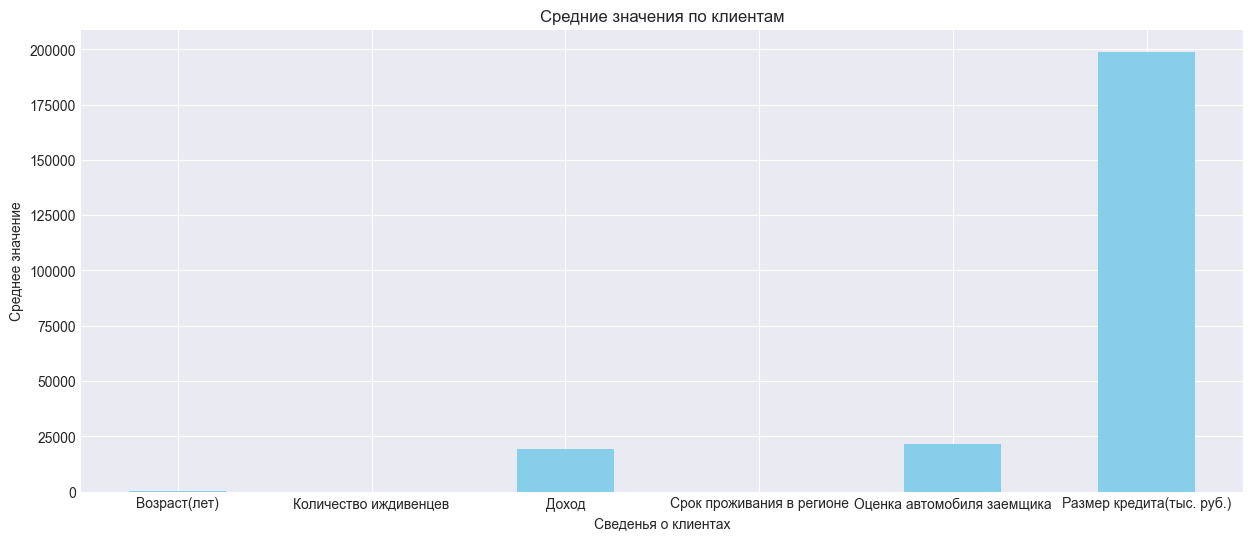

In [33]:
# Создаем гистограмму
plt.figure(figsize=(15, 6))
mean_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

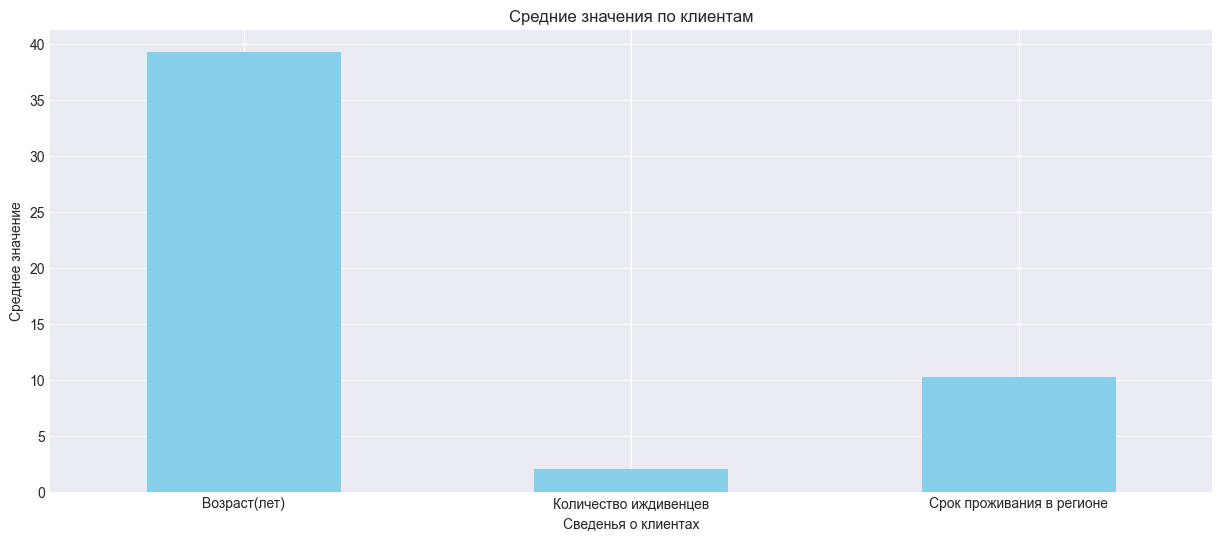

In [38]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
mean_values_small_values = mean_values.copy()
mean_values_small_values = mean_values_small_values.drop('Размер кредита(тыс. руб.)')
mean_values_small_values = mean_values_small_values.drop('Оценка автомобиля заемщика')
mean_values_small_values = mean_values_small_values.drop('Доход')

# Создаем гистограмму
plt.figure(figsize=(15, 6))
mean_values_small_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [41]:
# Стандартное отклонение по каждому столбцу
std_values = df.std(skipna=True)
std_values

Возраст(лет)                       8.979616
Количество иждивенцев              1.030570
Доход                           9979.478092
Срок проживания в регионе          4.798136
Оценка автомобиля заемщика     11264.069056
Размер кредита(тыс. руб.)     100571.179146
dtype: float64

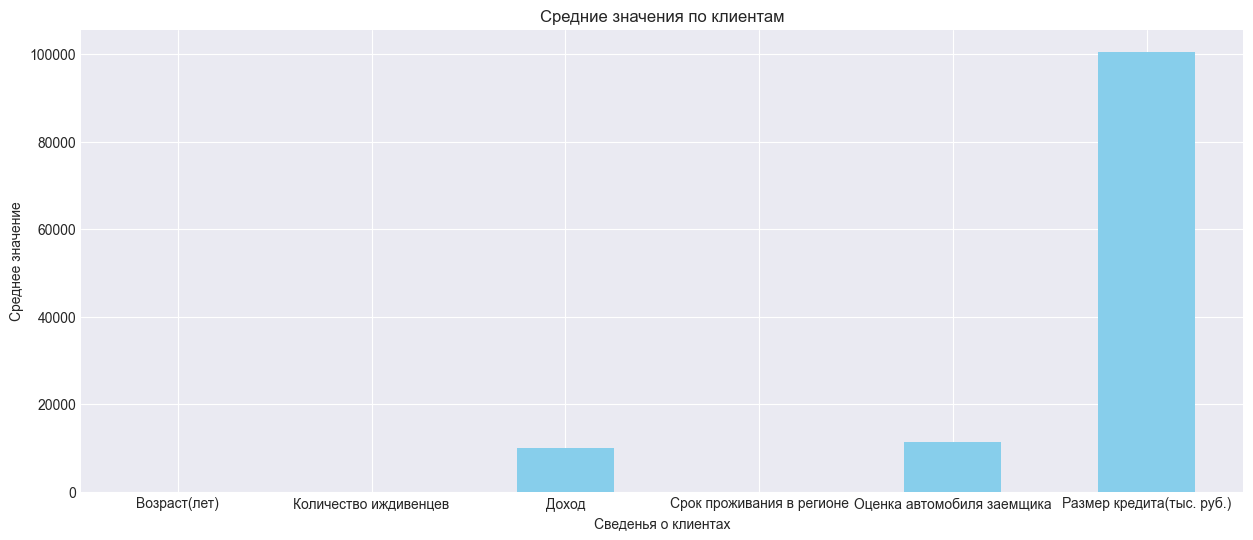

In [39]:
# Создаем гистограмму
plt.figure(figsize=(15, 6))
std_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

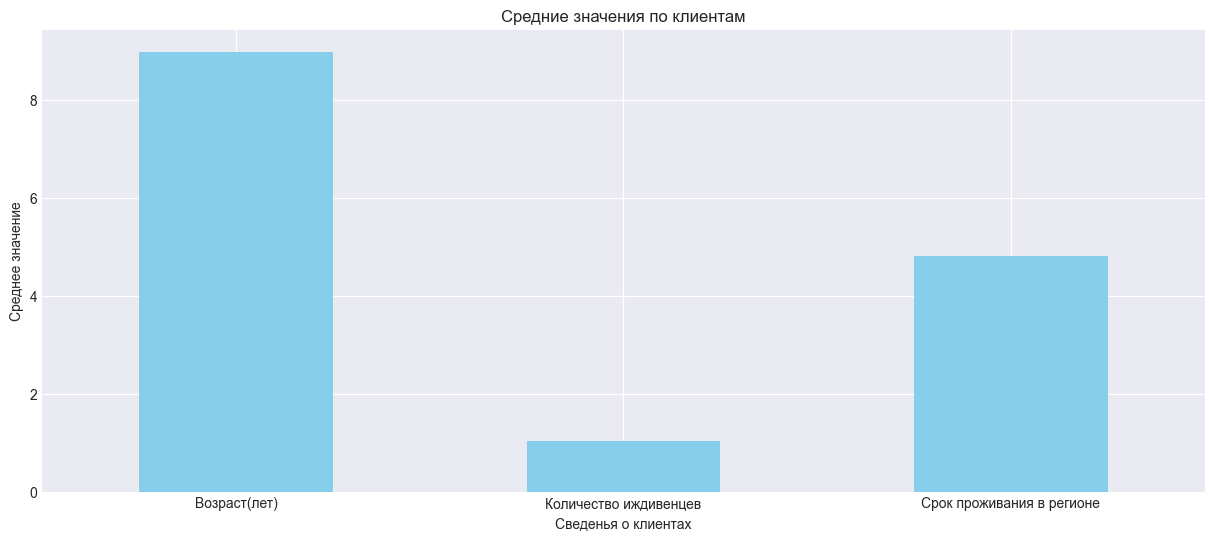

In [42]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
std_values_small_values = std_values.copy()
std_values_small_values = std_values_small_values.drop('Размер кредита(тыс. руб.)')
std_values_small_values = std_values_small_values.drop('Оценка автомобиля заемщика')
std_values_small_values = std_values_small_values.drop('Доход')

# Создаем гистограмму
plt.figure(figsize=(15, 6))
std_values_small_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [13]:
# Медиана по каждому столбцу
median_values = df.median(skipna=True)
median_values

Возраст(лет)                      39.0
Количество иждивенцев              2.0
Доход                          19600.0
Срок проживания в регионе         10.0
Оценка автомобиля заемщика     23000.0
Размер кредита(тыс. руб.)     193000.0
dtype: float64

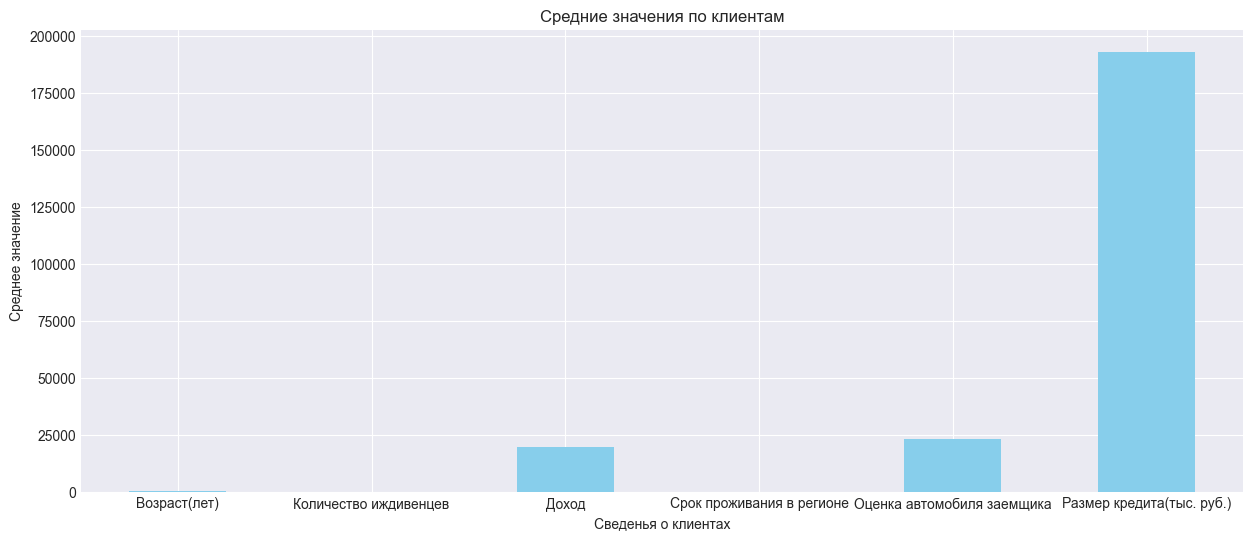

In [43]:
# Создаем гистограмму
plt.figure(figsize=(15, 6))
median_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

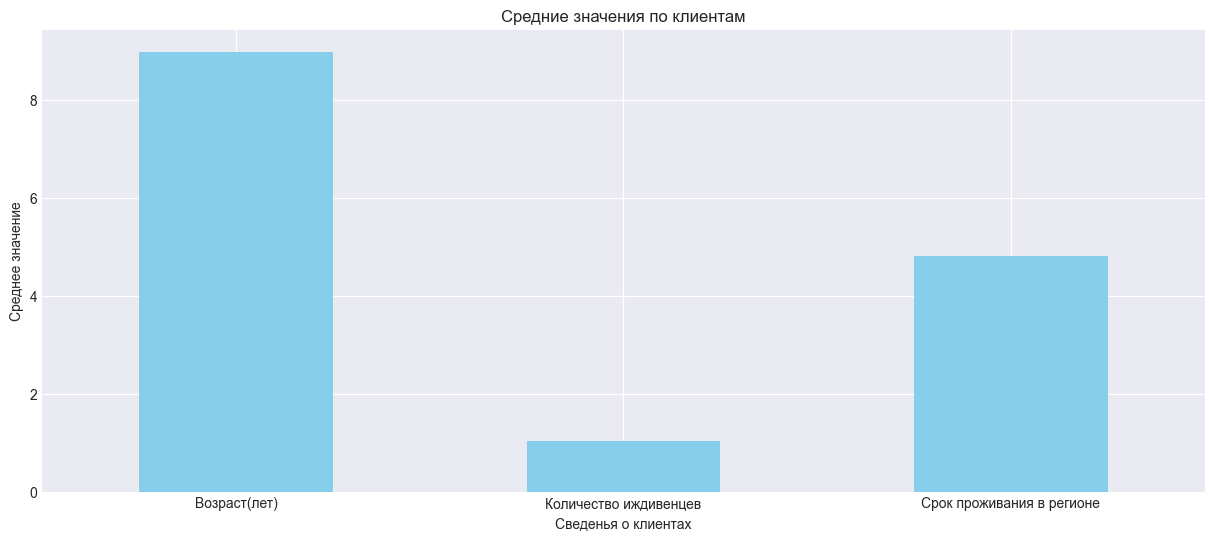

In [44]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
median_values_small_values = std_values.copy()
median_values_small_values = median_values_small_values.drop('Размер кредита(тыс. руб.)')
median_values_small_values = median_values_small_values.drop('Оценка автомобиля заемщика')
median_values_small_values = median_values_small_values.drop('Доход')

# Создаем гистограмму
plt.figure(figsize=(15, 6))
median_values_small_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

In [47]:
# Расчет квартилей (25%, 50%, 75%)
quantiles = df.quantile([0.25, 0.5, 0.75], interpolation='midpoint')
quantiles

,Возраст(лет),Количество иждивенцев,Доход,Срок проживания в регионе,Оценка автомобиля заемщика,Размер кредита(тыс. руб.)
0.25,33.0,1.0,9800.0,7.0,12000.0,106000.0
0.50,39.0,2.0,19600.0,10.0,23000.0,193000.0
0.75,45.0,3.0,28400.0,13.0,29000.0,289000.0


<Figure size 1500x600 with 0 Axes>

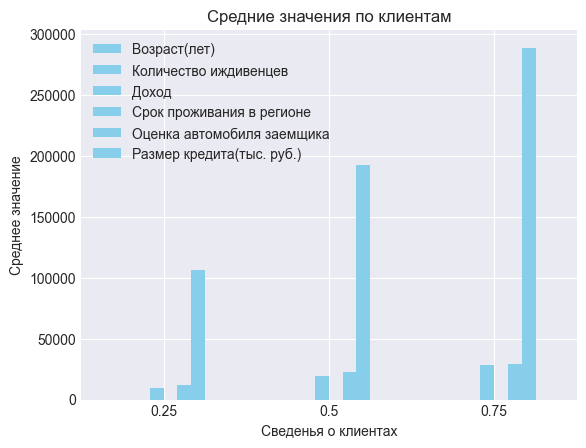

In [48]:
# Создаем гистограмму
plt.figure(figsize=(15, 6))
quantiles.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()

<Figure size 1500x600 with 0 Axes>

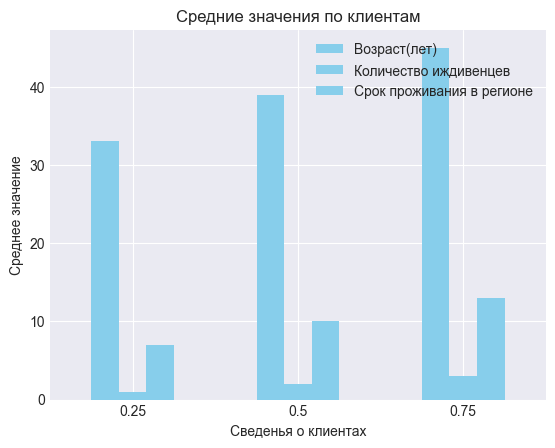

In [57]:
# Оставляем только малые значения чтобы подробнее их рассмотреть
quantiles_small_values = quantiles.copy()
quantiles_small_values = quantiles_small_values.drop('Размер кредита(тыс. руб.)', axis=1)
quantiles_small_values = quantiles_small_values.drop('Оценка автомобиля заемщика', axis=1)
quantiles_small_values = quantiles_small_values.drop('Доход', axis=1)

# Создаем гистограмму
plt.figure(figsize=(15, 6))
quantiles_small_values.plot(kind='bar', color='skyblue')

# Добавляем подписи и заголовок
plt.title('Средние значения по клиентам')
plt.xlabel('Сведенья о клиентах')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)

# Показать график
plt.show()